# Titanic kaggle competition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

### Loading the test and train datasets

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Noticing 177 null Age value and 687 null Cabin values and 2 embarked null values in the training data

### Extracting the titles from the names using regular expression

In [5]:
train['Title']= 0
train['Title']= train.Name.str.extract('([A-Za-z]+)\.')

test['Title']= 0
test['Title']= test.Name.str.extract('([A-Za-z]+)\.')

In [6]:
train.Title.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


### Plotting histograms to further understand our data and check for outliers 

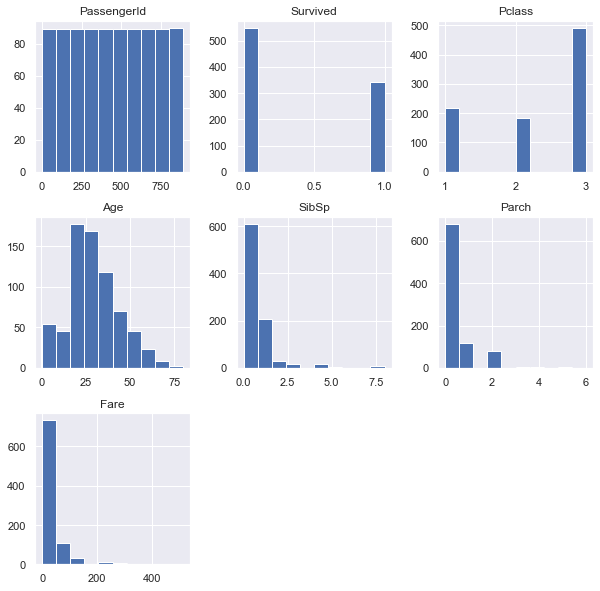

In [8]:
train.hist(figsize=(10,10));

#### We can see that there are outliers in the Fare column

### Checking a reasonable quantile to drop the outliers 

In [9]:
fare_quantile = train.Fare.quantile(0.99)
fare_quantile

249.00622000000035

In [10]:
train = train[train['Fare'] < fare_quantile]

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 882 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  882 non-null    int64  
 1   Survived     882 non-null    int64  
 2   Pclass       882 non-null    int64  
 3   Name         882 non-null    object 
 4   Sex          882 non-null    object 
 5   Age          705 non-null    float64
 6   SibSp        882 non-null    int64  
 7   Parch        882 non-null    int64  
 8   Ticket       882 non-null    object 
 9   Fare         882 non-null    float64
 10  Cabin        196 non-null    object 
 11  Embarked     880 non-null    object 
 12  Title        882 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 96.5+ KB


In [12]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,882.000000,882.000000,882.000000,705.000000,882.000000,882.000000,882.000000
mean,446.435374,0.379819,2.321995,29.688184,0.512472,0.368481,29.002508
std,257.357635,0.485617,0.829749,14.537360,1.096047,0.791013,36.569302
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.250000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,447.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.750000,1.000000,3.000000,38.000000,1.000000,0.000000,30.500000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,247.520800


#### The max fare is still far from the mean and standard deviation but is better than before, we don't want to reduce the training dataset more than that

### We can drop the Name column as we extracted the desired feature from it
### Dropping the PassengerId and Ticket columns as they won't be helpful to determine the people who survived
### Dropping the Cabin column as it has more than %75 of the data missing

In [13]:
train.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis = 1,inplace= True)
test.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis = 1,inplace= True)

In [14]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


### Defining the encoder function to change categorical values to numeric

In [15]:
def Encoder(df):
          columnsToEncode = list(df.select_dtypes(include=['category','object']))
          le = LabelEncoder()
          for feature in columnsToEncode:
              try:
                  df[feature] = le.fit_transform(df[feature])
              except:
                  print('Error encoding '+feature)
          return df

In [16]:
train = Encoder(train)
test = Encoder(test)

In [17]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,22.0,1,0,7.2500,2,12
1,1,1,0,38.0,1,0,71.2833,0,13
2,1,3,0,26.0,0,0,7.9250,2,9
3,1,1,0,35.0,1,0,53.1000,2,13
4,0,3,1,35.0,0,0,8.0500,2,12


In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    int64  
 7   Title     418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


#### We notice that 86 Age values are missing from the test data and there's a single missing fare value

## We quickly replace the single missing Fare value with the mean of the column

In [19]:
fare_mean = test.Fare.mean()

In [20]:
test.Fare.fillna(fare_mean, inplace= True)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 882 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  882 non-null    int64  
 1   Pclass    882 non-null    int64  
 2   Sex       882 non-null    int64  
 3   Age       705 non-null    float64
 4   SibSp     882 non-null    int64  
 5   Parch     882 non-null    int64  
 6   Fare      882 non-null    float64
 7   Embarked  882 non-null    int64  
 8   Title     882 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 68.9 KB


## Random Forest Regressor to get missing Age values

In [22]:
rfr = RandomForestRegressor(n_estimators=2000, n_jobs=-1)

#### As the training set is small we can use 2000 Trees in our random forest model and set n_jobs to -1 to use all CPUs

### Splitting our Train and Test Data depending on whether they hava a True Age value or nan Age value respectively

In [23]:
train_age_train = train.loc[(train.Age.notnull())] # extracting rows that has Age as not null
train_age_test = train.loc[(train.Age.isnull())]  # all nan age values

y = train_age_train.values[:, 3] #selecting the age column
X = train_age_train.values[:, [1,2,4,5,6,7,8]] #selecting the features

rfr.fit(X, y)

predicted_ages = rfr.predict(train_age_test.values[:, [1, 2, 4, 5, 6, 7, 8]]) # predicting the nan Age values
train_age_test.Age = predicted_ages

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [24]:
train.Age.fillna(train_age_test.Age, inplace= True)

#### We can ignore the warning as we already want to make these changes to our original dataset

In [25]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,1,34.5,0,0,7.8292,1,5
1,3,0,47.0,1,0,7.0000,2,6
2,2,1,62.0,0,0,9.6875,1,5
3,3,1,27.0,0,0,8.6625,2,5
4,3,0,22.0,1,1,12.2875,2,6


### Applying the changes to the Age column in the test dataset

In [26]:
test_age_null = test.loc[(test.Age.isnull())]
predicted_ages = rfr.predict(test_age_null.values[:, [0,1,3, 4, 5, 6, 7]])
test_age_null.Age = predicted_ages
test.Age.fillna(test_age_null.Age, inplace= True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


### Identifying the feature columns and the label column

In [27]:
X_train = train.drop('Survived', axis = 1)
y_train = train.Survived
X_test = test

### Applying StandardScaler to the features of both the train and test data

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [29]:
train_columns = train.drop('Survived', axis = 1).columns
test_columns = test.columns

### Creating new dataframes for the scaled data

In [30]:
X_train = pd.DataFrame(data = X_train, columns= train_columns)
X_test = pd.DataFrame(data = X_test, columns= test_columns)

### Fitting our Random Forest classifier model and predicting the labels of the test data

In [31]:
rfc = RandomForestClassifier(n_estimators = 2000)
rfc_model = rfc.fit(X_train, y_train)
rfc_pred = rfc_model.predict(X_test)

In [32]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Title'], dtype='object')

### Checking feature importance

In [33]:
fi_array = rfc_model.feature_importances_
fi = [fi_array]
fi_df = pd.DataFrame(data = fi, columns = X_train.columns)
fi_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0.081305,0.193013,0.254654,0.053437,0.033008,0.240428,0.030306,0.113848


#### Age was the most important feature for determining the surviving passengers, followed by the Fare , then by Sex and then by the feature engineered Title

In [34]:
test['Survived'] = rfc_pred

In [35]:
test.head(20)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Survived
0,3,1,34.500000,0,0,7.8292,1,5,0
1,3,0,47.000000,1,0,7.0000,2,6,0
2,2,1,62.000000,0,0,9.6875,1,5,0
3,3,1,27.000000,0,0,8.6625,2,5,0
4,3,0,22.000000,1,1,12.2875,2,6,0
5,3,1,14.000000,0,0,9.2250,2,5,0
6,3,0,30.000000,0,0,7.6292,1,4,0
7,2,1,26.000000,1,1,29.0000,2,5,0
8,3,0,18.000000,0,0,7.2292,0,6,1
9,3,1,21.000000,2,0,24.1500,2,5,0


In [36]:
train.query('Survived == 1').shape[0] / train.shape[0]

0.3798185941043084

In [37]:
test.query('Survived == 1').shape[0] / test.shape[0]

0.35645933014354064

#### As we don't have the labels for the test data we cannot judge the accuracy or other metrics of our model, however we find that the percentage of the people who survived from the train dataset is close enough to the percentage of the people who survived from the test dataset